In [17]:
import pandas as pd
import numpy as np 
from math import pi
import matplotlib.pyplot as plt

In [2]:
mdata = pd.read_csv("1632560262896716 (1).csv")
mdata["Gender"] = mdata["Gender"].apply(lambda x : 1 if x =="Male" else 0)
mdata

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


# KMeans

In [3]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
sdata = mdata.drop(["CustomerID"] , axis =1)

normalize = StandardScaler().fit_transform(sdata)
k_means = KMeans(n_clusters = 5 , init  = "k-means++" , n_init = 12)
normalize
print(sdata)

     Gender  Age  Annual Income (k$)  Spending Score (1-100)
0         1   19                  15                      39
1         1   21                  15                      81
2         0   20                  16                       6
3         0   23                  16                      77
4         0   31                  17                      40
..      ...  ...                 ...                     ...
195       0   35                 120                      79
196       0   45                 126                      28
197       1   32                 126                      74
198       1   32                 137                      18
199       1   30                 137                      83

[200 rows x 4 columns]


In [4]:
k_means.fit(normalize)
labels = k_means.labels_
print(labels)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[2 2 0 1 0 1 0 1 4 1 4 1 0 1 4 2 0 2 4 1 4 2 0 2 0 2 0 2 0 1 4 1 4 2 0 1 0
 1 0 1 0 2 4 1 0 1 0 1 1 1 0 2 1 4 0 4 0 4 1 4 4 2 0 0 4 2 0 0 2 1 4 0 0 0
 4 2 0 2 1 0 4 2 4 0 1 4 0 1 1 0 0 2 4 0 1 2 0 1 4 2 1 0 4 2 4 1 0 4 4 4 4
 1 0 2 1 1 0 0 0 0 2 0 1 2 1 1 3 2 4 2 3 2 1 1 3 1 0 2 3 1 0 2 1 1 3 2 3 1
 3 2 3 2 0 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 2 3 2 3 2 3 1 3 2 3 2 3 1 3 1 3
 2 3 2 3 1 3 1 3 1 3 1 3 2 3 2]


In [5]:
sdata["group"] = labels
sdata.groupby(sdata["group"]).mean()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
group,,,,
0,0.000000,49.043478,48.913043,37.217391
1,0.000000,28.392857,60.428571,68.178571
2,1.000000,28.536585,61.804878,71.097561
3,0.655172,39.724138,90.827586,17.620690
4,1.000000,57.214286,46.785714,38.714286


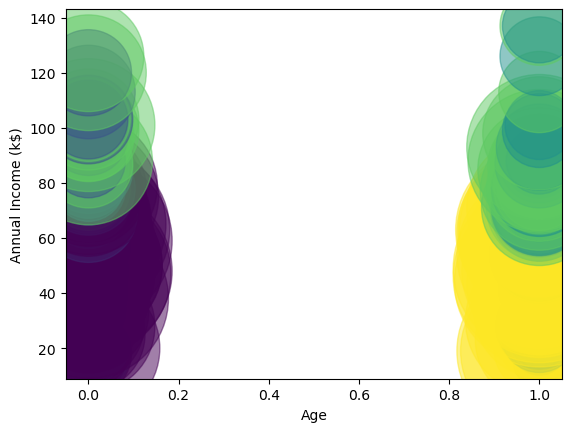

In [21]:
area = np.pi* (sdata.iloc[:,1])**2
plt.scatter(sdata.iloc[:,0],sdata.iloc[:,2] , s = area , c = labels.astype(float) , alpha = 0.5)
plt.xlabel("Age", fontsize = 10)
plt.ylabel("Annual Income (k$)" , fontsize = 10)
plt.show()

# Hierarchical

In [13]:
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.cluster import AgglomerativeClustering
distance_matrix = euclidean_distances(normalize,normalize)

In [18]:
agglomerative = AgglomerativeClustering(n_clusters = 6,linkage = "complete")
agglomerative.fit(distance_matrix)
agglomerative.labels_

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:544: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


array([0, 0, 4, 0, 3, 0, 4, 0, 4, 0, 4, 0, 1, 0, 1, 0, 3, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 3, 1, 0, 4, 0, 4, 0, 1, 0, 1, 3, 1, 0, 1, 0, 1, 3,
       1, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 1, 3, 1, 3, 1, 1, 3, 1, 1, 1, 3,
       3, 1, 3, 3, 1, 3, 1, 1, 1, 3, 3, 3, 3, 3, 1, 3, 1, 3, 3, 1, 1, 3,
       3, 3, 1, 3, 1, 3, 3, 3, 3, 3, 1, 3, 3, 3, 1, 3, 1, 3, 1, 1, 1, 1,
       1, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 0, 3, 0, 1, 0, 2, 0, 2, 0,
       3, 0, 2, 0, 2, 0, 2, 0, 2, 0, 3, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 5, 5, 2, 5, 2, 5,
       5, 5], dtype=int64)

In [40]:
sdata["cluster"] = agglomerative.labels_
sdata

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,19,15,39,0
1,1,21,15,81,0
2,0,20,16,6,4
3,0,23,16,77,0
4,0,31,17,40,3
...,...,...,...,...,...
195,0,35,120,79,5
196,0,45,126,28,2
197,1,32,126,74,5
198,1,32,137,18,5


In [43]:
sdata.groupby(["cluster","Gender"])["cluster"].count()

cluster  Gender
0        0         30
         1         25
1        0         20
         1         25
2        0         14
         1         16
3        0         44
         1         14
4        0          2
         1          4
5        0          2
         1          4
Name: cluster, dtype: int64

In [47]:
agglomerative_customer = sdata.groupby(["cluster","Gender"])[["Age","Annual Income (k$)", "Spending Score (1-100)"]].mean()
agglomerative_customer

Age  Annual Income (k$)  Spending Score (1-100)
cluster Gender                                                       
0       0       29.333333           61.166667               81.800000
        1       29.840000           60.960000               80.320000
1       0       55.050000           43.800000               36.100000
        1       55.600000           51.440000               44.760000
2       0       43.785714           93.285714               20.642857
        1       39.625000           81.562500               11.500000
3       0       35.113636           53.454545               48.272727
        1       25.857143           53.357143               53.571429
4       0       27.500000           17.000000                6.000000
        1       61.000000           25.250000                6.250000
5       0       36.500000          116.500000               85.000000
        1       31.750000          128.250000               45.750000

# DBSCAN

In [11]:
from sklearn.cluster import DBSCAN
db_form = DBSCAN(eps = 0.15 , min_samples = 10).fit(normalize)
core_samples_mask = np.zeros_like(db_form.labels_ , dtype = bool)
core_samples_mask[db_form.core_sample_indices_] = True
labels = db_form.labels_
mdata["db_cluster"] = labels